In [1]:
#Temperature Forecast Project

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset

df = pd.read_csv('C:\\Users\Dell\\Evaluation Project\\Temperature Prediction\\temperature.csv')

In [4]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
df.shape

(7752, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [8]:
df.dtypes.value_counts()

float64    24
object      1
dtype: int64

In [46]:
#seperating caterorical and continous variables
cont = [i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat = [i for i in df.columns if df[i].nunique()<30]

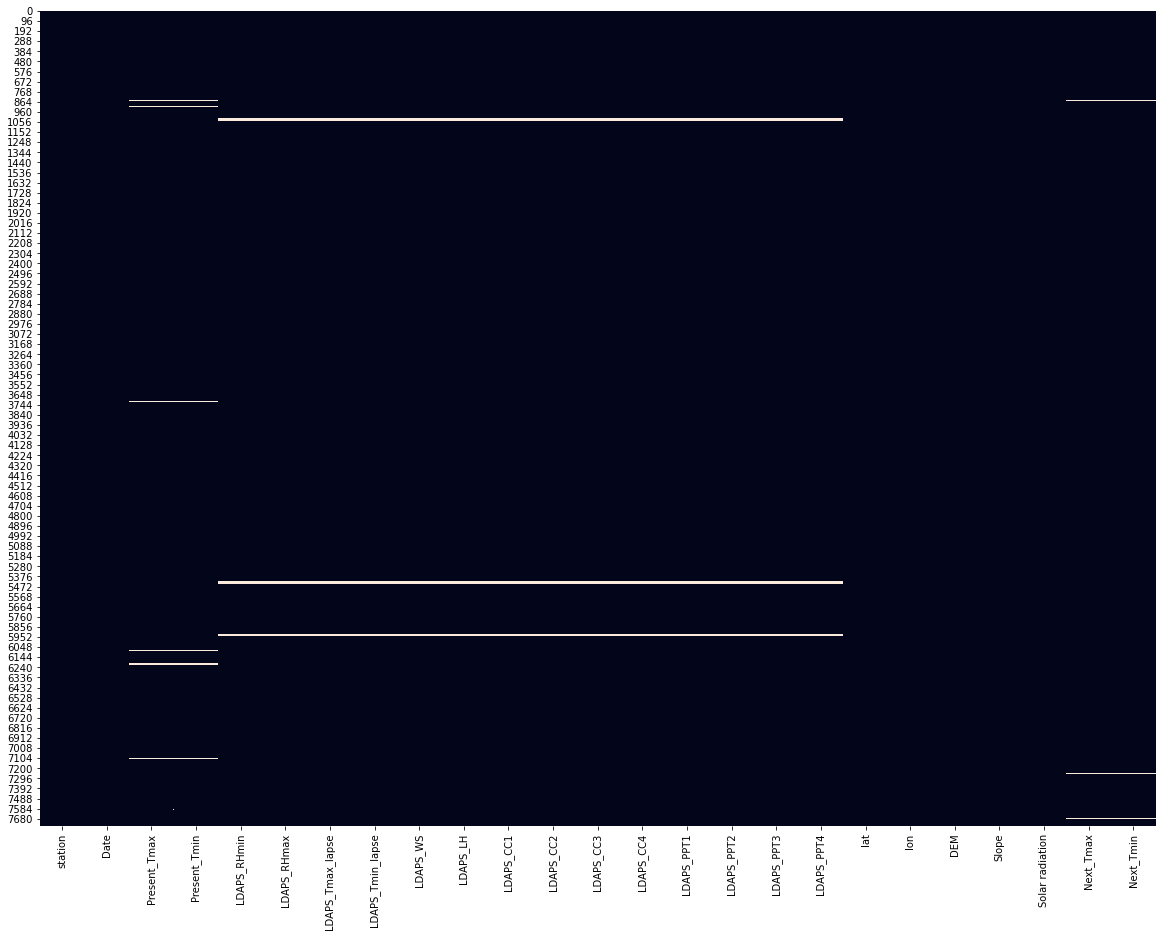

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [10]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

LDAPS_CC3           0.967492
LDAPS_WS            0.967492
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT1          0.967492
LDAPS_CC4           0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_CC2           0.967492
LDAPS_CC1           0.967492
LDAPS_LH            0.967492
Present_Tmax        0.902993
Present_Tmin        0.902993
Next_Tmin           0.348297
Next_Tmax           0.348297
Date                0.025800
station             0.025800
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
dtype: float64

In [11]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

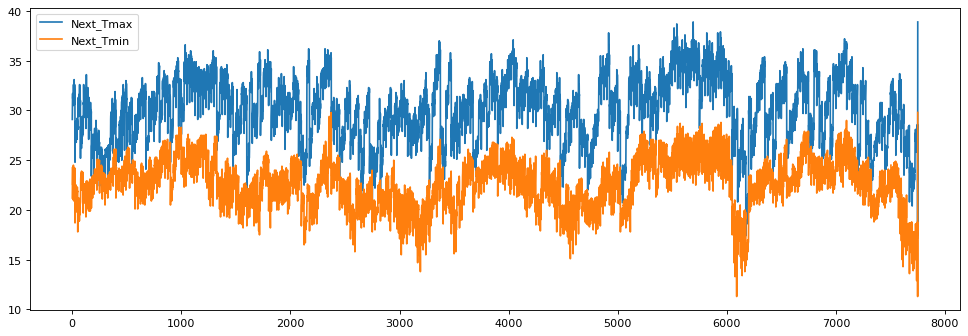

In [12]:
plt.figure(figsize=(15,5), dpi=80)
plt.plot(df['Next_Tmax'], label='Next_Tmax')
plt.plot(df['Next_Tmin'], label='Next_Tmin')
plt.legend()
plt.show()

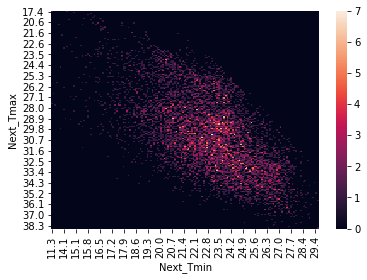

In [13]:
plt.figure()
sns.heatmap(pd.crosstab(df['Next_Tmax'],df['Next_Tmin']))
plt.show()

<AxesSubplot:>

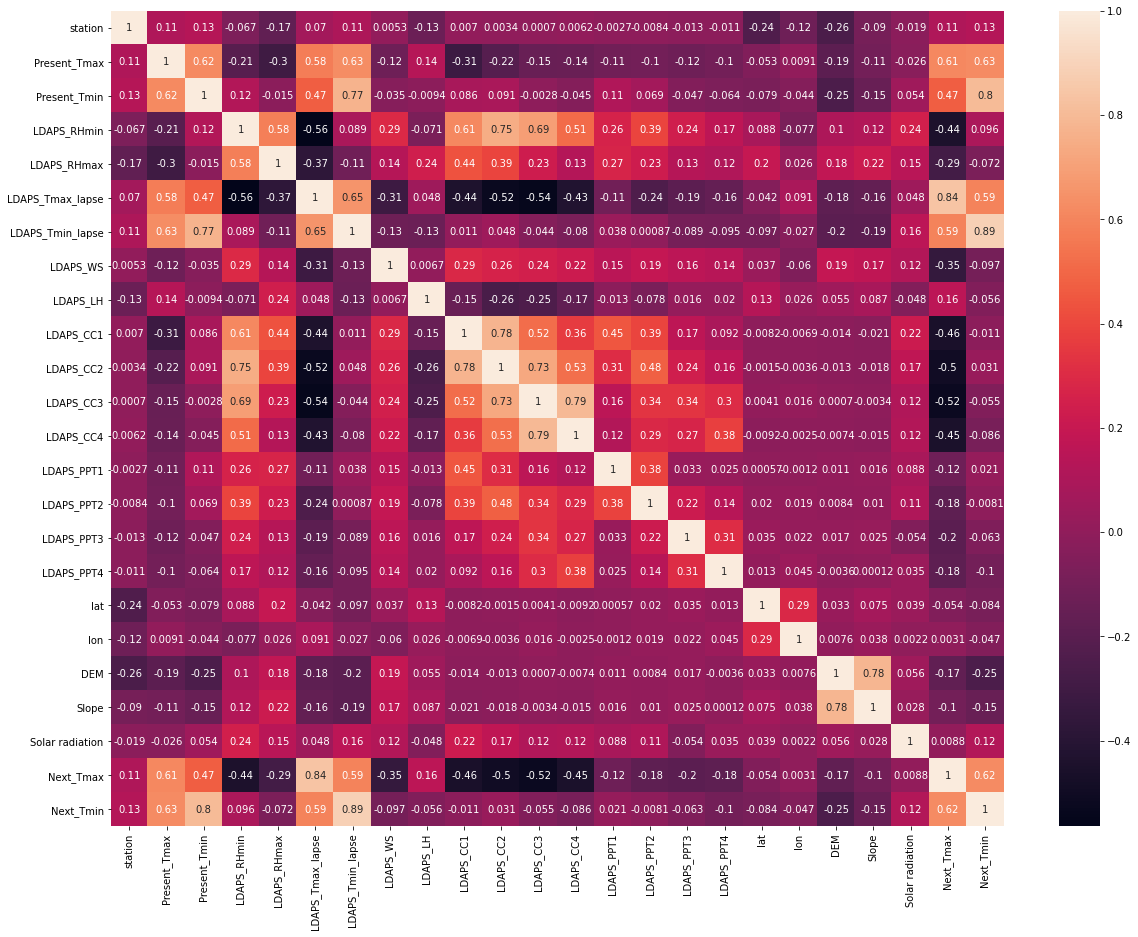

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
#Droping null values

df= df.dropna().reset_index()

In [16]:
#again cheking null value

df.isna().sum()

index               0
station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [17]:
#preprocessing

In [18]:
df.columns

Index(['index', 'station', 'Date', 'Present_Tmax', 'Present_Tmin',
       'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
       'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3',
       'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
       'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax',
       'Next_Tmin'],
      dtype='object')

In [19]:
#droping colums
df.drop('Date', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)

In [20]:
df['Slope'].unique()

array([2.785 , 0.5141, 0.2661, 2.5348, 0.5055, 0.1457, 0.0985, 1.5629,
       0.4125, 5.1782, 0.6233, 0.5931, 2.6865, 0.618 , 0.8552, 2.2579,
       0.697 , 1.2313, 1.7678, 4.7296, 0.5721, 0.1332, 0.1554, 0.2223,
       0.2713])

In [21]:
df['Slope'].replace({})

0       2.7850
1       0.5141
2       0.2661
3       2.5348
4       0.5055
         ...  
7583    0.5721
7584    0.1332
7585    0.1554
7586    0.2223
7587    0.2713
Name: Slope, Length: 7588, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.6970000000000001'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

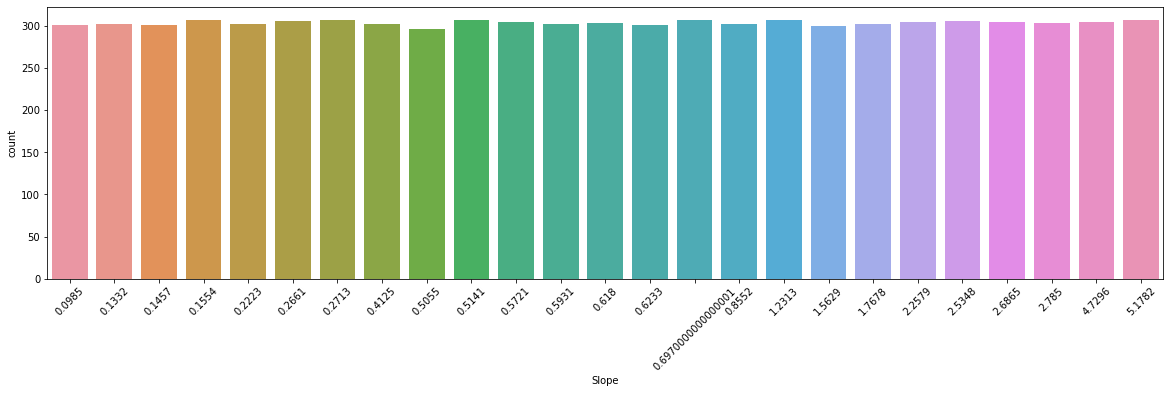

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

In [23]:
#imputing null values

In [24]:
from scipy.stats import mode

In [25]:
#droping rows which cannt impute
df = df[df['Next_Tmax'].notnull()]

In [26]:
table = pd.pivot_table(values = 'station', index = 'Slope', data = df)

In [28]:
table.head()

,station
Slope,
0.0985,7.0
0.1332,22.0
0.1457,6.0
0.1554,23.0
0.2223,24.0


In [29]:
#filling into nan values of station from slope columns

def sta(x):
    return table.loc[x['Slope'],'station']

In [32]:
#deleting rows

df.dropna(subset= df.columns, thresh=14, inplace=True)

In [33]:
#current Tmax and Tmin

# droping null values

df.dropna(inplace=True)

<AxesSubplot:>

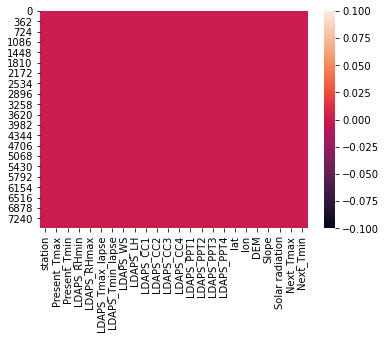

In [34]:
#checking in heatmap
sns.heatmap(df.isnull())

In [35]:
#we can see in the above graph there are no null values

In [37]:
#removing outliers

from scipy.stats import zscore

In [40]:
# creating a fucntion to choose threshold

def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data= data[(z<i).all(axis = 1)]
        loss = (d.shape[0]-data.shape[0])/d.shape[0]*100
        print('threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [41]:
z = np.abs(zscore(df))
threhold(z,df)

threshold 3.0 data loss is 11.19%
threshold 3.2 data loss is 9.66%
threshold 3.4 data loss is 8.45%
threshold 3.6 data loss is 7.7%
threshold 3.8 data loss is 6.96%
threshold 4.0 data loss is 6.31%
threshold 4.2 data loss is 5.88%
threshold 4.4 data loss is 5.27%
threshold 4.6 data loss is 4.82%
threshold 4.8 data loss is 4.39%


In [42]:
df = df[(z<4.2).all(axis=1)]

In [43]:
#skewness removing

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [47]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

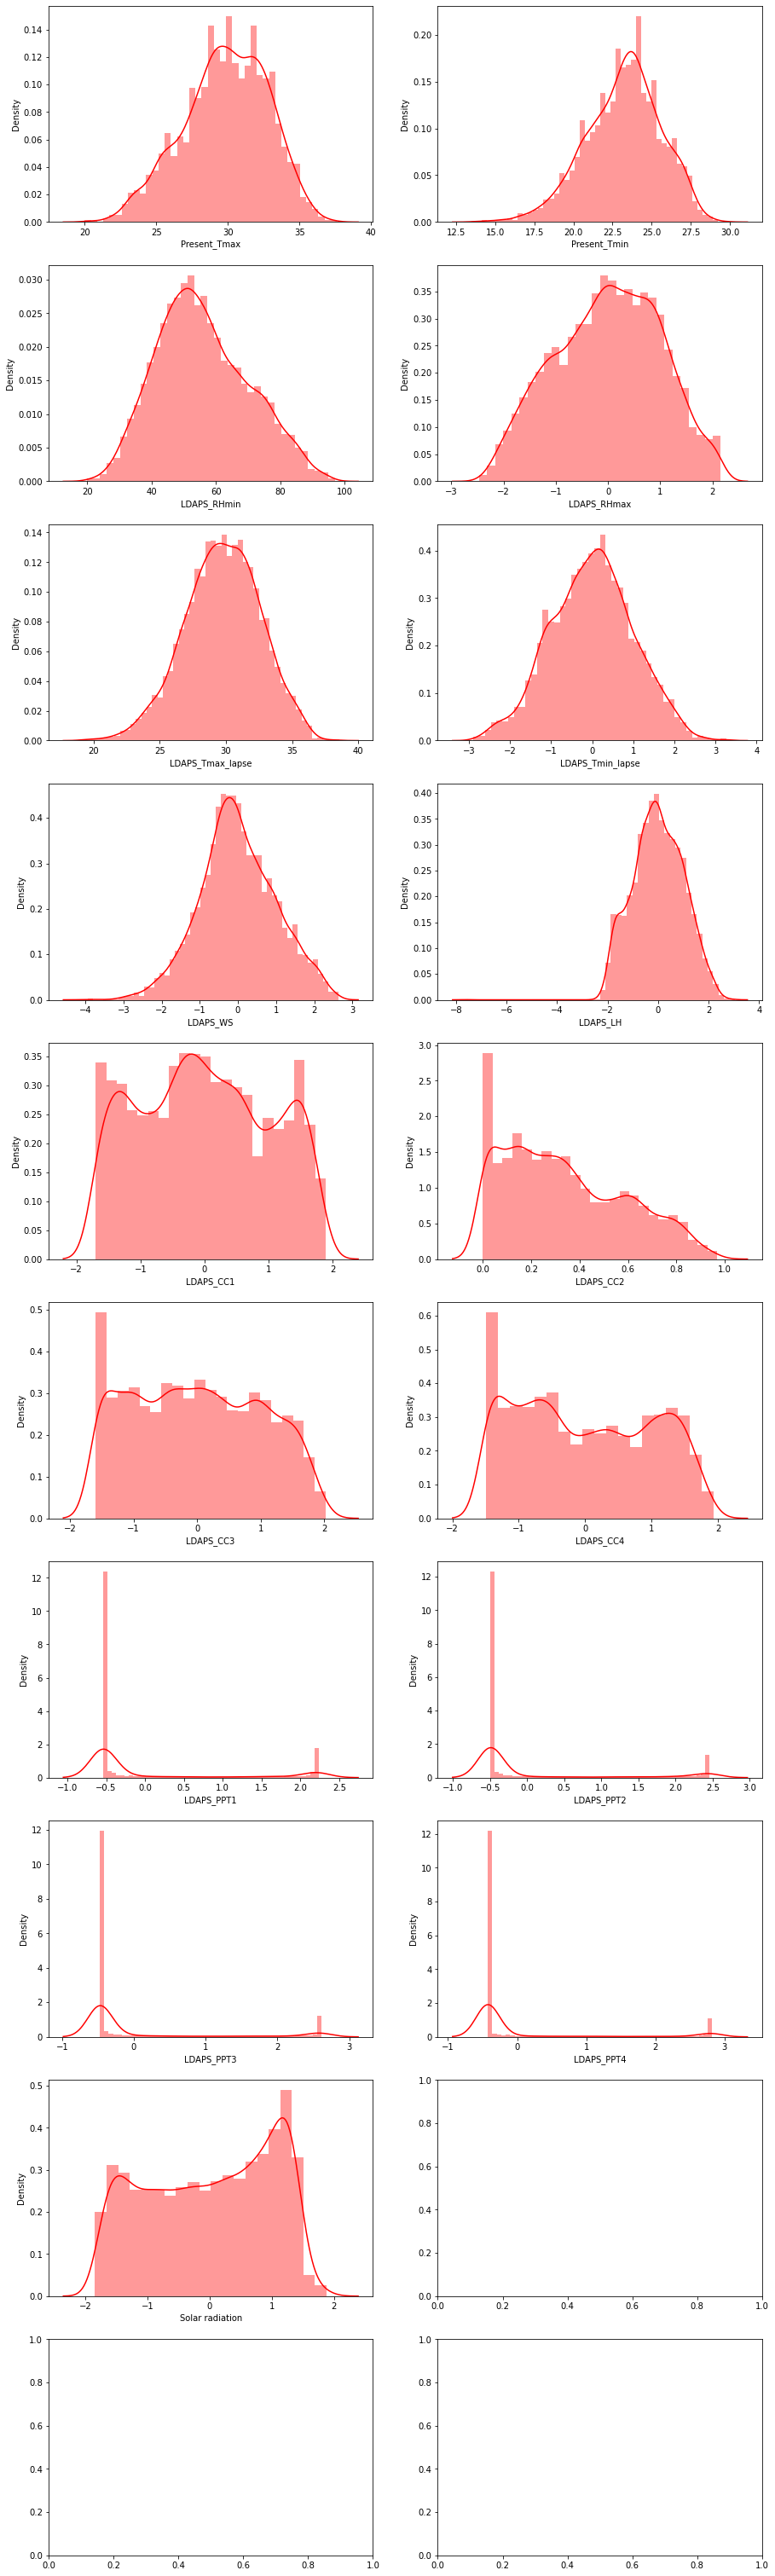

In [49]:
fig, ax=plt.subplots(10,2, figsize=(15,55))
r = 0
c= 0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n], color='r', ax=ax[r,c])
    c+=1

In [50]:
#seperating dependent and independent feaatures

x = df.copy()
x.drop(['Next_Tmax', 'Next_Tmin'], axis=1, inplace=True)
ymax= df['Next_Tmax']
ymin= df['Next_Tmin']

In [51]:
#scaling dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
xd = scaler.fit_transform(x)
x = pd.DataFrame(xd, columns=x.columns)

In [54]:
#modeling

In [62]:
#libraries

from sklearn.model_selection import train_test_split, cross_val_score

#models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [66]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [67]:
def createmodels(model_list,x,y,n):
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2)*100)
        mcv.append(np.round(np.mean(score),2)*100)
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross Validation Score']=mcv
    data.set_index('Model',inplace = True)
    return data   

In [68]:
createmodels(models, x , ymax, names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,1.0438,1.9286,1.3887,7.000000e+01,47.0
SVR,0.8461,1.3286,1.1526,8.200000e+01,65.0
LinearRegression,1.0455,1.8499,1.3601,7.400000e+01,70.0
Lasso,2.4453,8.8967,2.9827,-7.048728e+31,-7.0
Ridge,1.0446,1.8511,1.3606,7.400000e+01,70.0
DecisionTreeRegressor,0.9991,1.9475,1.3955,7.900000e+01,44.0
RandomForestRegressor,0.7061,0.8973,0.9473,8.800000e+01,68.0
AdaBoostRegressor,1.2031,2.2197,1.4899,6.200000e+01,66.0
GradientBoostingRegressor,0.8890,1.3169,1.1475,8.200000e+01,70.0


In [69]:
createmodels(models, x, ymin, names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
KNeighborsRegressor,0.8201,1.1841,1.0881,70.0,47.0
SVR,0.6112,0.6193,0.7870,88.0,75.0
LinearRegression,0.7644,0.9232,0.9608,82.0,78.0
Lasso,1.9588,5.9773,2.4449,0.0,-14.0
Ridge,0.7645,0.9225,0.9605,81.0,78.0
DecisionTreeRegressor,0.8735,1.3910,1.1794,76.0,58.0
RandomForestRegressor,0.5682,0.5524,0.7432,89.0,78.0
AdaBoostRegressor,0.8645,1.1335,1.0647,74.0,74.0
GradientBoostingRegressor,0.6312,0.6445,0.8028,87.0,80.0


In [71]:
#hyperparamener tuning

xtrain_max, xtest_max, ytrain_max, ytest_max = train_test_split(x,ymax, test_size=0.25, random_state = randomstate(x,ymax))

In [72]:
#ridge regressor
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200,
                     230, 250,265, 270, 275, 290, 300, 500,1000]}

In [73]:
g = GridSearchCV(Ridge(), params, cv=10)

<IPython.core.display.Javascript object>

In [74]:
g.fit(xtrain_max, ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [75]:
g.fit(xtrain_max, ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [76]:
print(g.best_estimator_)

Ridge(alpha=0.1)


In [78]:
print(g.best_params_)

{'alpha': 0.1}


In [79]:
print(g.best_score_)

0.7613510980492191


In [80]:
m = Ridge(alpha=0.1)
m.fit(xtrain_max, ytrain_max)
p = m.predict(xtest_max)

In [81]:
score = cross_val_score (m, x, ymax, cv= 10)

In [82]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 1.0453
Mean Squared Error is 1.8499
Root Mean Squared Error is 1.3601
R2 Score is 73.89
Mean of cross validaton Score is 66.3539


In [83]:
#random forest

params={'n_estimators':[100,200, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
g = RandomizedSearchCV (RandomForestRegressor(), params, cv=10, n_jobs=-2)

In [87]:
g.fit(xtrain_max, ytrain_max)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-2,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500]})

In [88]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=3, n_estimators=500)
{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': None}
0.8822675134059406


In [89]:
m=RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,n_estimators=200)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [90]:
score=cross_val_score(m,x,ymax,cv=10)

In [91]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.7263
Mean Squared Error is 0.9501
Root Mean Squared Error is 0.9747
R2 Score is 87.03
Mean of cross validaton Score is 64.8698


In [92]:
# gradinet boost
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

g=RandomizedSearchCV(GradientBoostingRegressor(),params,cv=10)
g.fit(xtrain_max,ytrain_max)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [93]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}
GradientBoostingRegressor(max_depth=8, n_estimators=200, subsample=0.5)
0.912838290679654


In [94]:
m=GradientBoostingRegressor(max_depth=7, n_estimators=500, subsample=1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [99]:
mscore=cross_val_score(m,x,ymax,cv=10)

In [103]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(mscore)*100,4))

Mean Absolute Error is 0.6288
Mean Squared Error is 0.7329
Root Mean Squared Error is 0.8561
R2 Score is 90.72
Mean of cross validaton Score is 63.8088


In [101]:
#hence gradient boost is given best performance.

In [102]:
#saving model

import joblib

In [104]:
joblib.dump(mscore,'final_model.pkl')

['final_model.pkl']